# 什么是模型验证

## 错误的模型验证方法

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
model.fit(X, y)
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

## 模型验证正确方法：留出集

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# 每个数据集分一半数据
X1, X2, y1, y2 = train_test_split(X, y,
                                  random_state=0,
                                  test_size=0.5) # 训练集占比0.5

# 用模型拟合训练数据
model.fit(X1, y1)

# 在测试集中评估模型准确率
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

## 交叉验证

In [7]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, # 模型
                X, y, # 数据
                cv=5) # 5折交叉验证

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [9]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, # 模型
                         X, y, # 数据
                         cv=LeaveOneOut()) # 留一交叉验证
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
scores.mean()

0.96

# 选择最优模型

## 偏差与方差的均衡

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [12]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # 随机抽样数据
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1) # ravel()扁平化
    if err > 0:
        y += err * rng.randn(N) # 加噪声
    return X, y

X, y = make_data(40)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # 设置图形样式

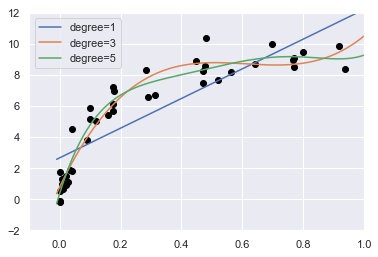

In [14]:
X_test = np.linspace(-0.01, 1.1, 500)[:, np.newaxis] # (500,)→(500, 1)
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test,
             label='degree={}'.format(degree)) # 标签
plt.xlim(-0.1, 1.0) # x轴范围设置
plt.ylim(-2, 12) # y轴范围设置
plt.legend(loc='best')

Text(0, 0.5, 'score')

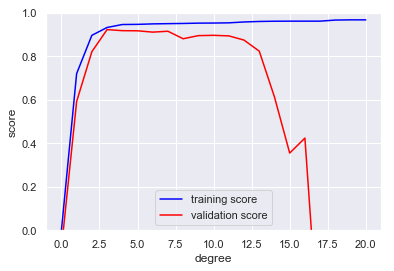

In [15]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), # 模型
                                          X, y, # 数据
                                          'polynomialfeatures__degree',
                                          degree, # 模型的degree参数
                                          cv=7)

plt.plot(degree, np.median(train_score, 1),
         color='blue', # 颜色
         label='training score') # 标签
plt.plot(degree, np.median(val_score, 1),
         color='red', # 颜色
         label='validation score') # 标签
plt.legend(loc='best') # 标签放置位置
plt.ylim(0, 1) # y轴范围
plt.xlabel('degree') # x轴名称
plt.ylabel('score') # y轴名称

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

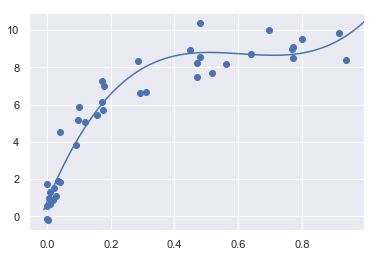

In [16]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

# 学习曲线

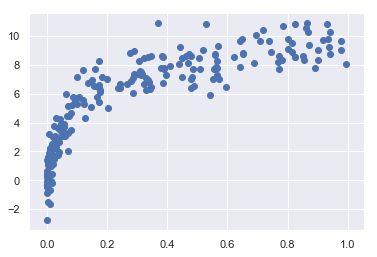

In [17]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

Text(0, 0.5, 'score')

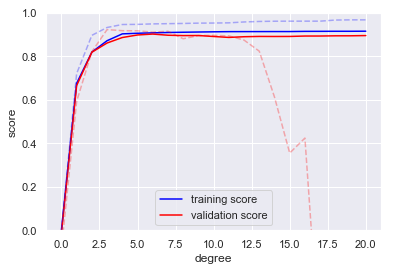

In [18]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), # 模型
                                            X2, y2, # 数据
                                            'polynomialfeatures__degree',
                                            param_range=degree, # 验证范围
                                            cv=7) # 7折交叉验证

plt.plot(degree, np.median(train_score2, 1), 
         color='blue', # 绿色
         label='training score') # 标签
plt.plot(degree, np.median(val_score2, 1),
         color='red', # 红色
         label='validation score') # 标签
plt.plot(degree, np.median(train_score, 1),
         color='blue', # 绿色
         alpha=0.3, # 透明度
         linestyle='dashed') # 点画线
plt.plot(degree, np.median(val_score, 1),
         color='red', # 红色
         alpha=0.3, # 透明度
         linestyle='dashed') # 点画线
plt.legend(loc='lower center') # 标签放置位置
plt.ylim(0, 1) # y轴范围设置
plt.xlabel('degree') # x轴名称
plt.ylabel('score') # y轴名称

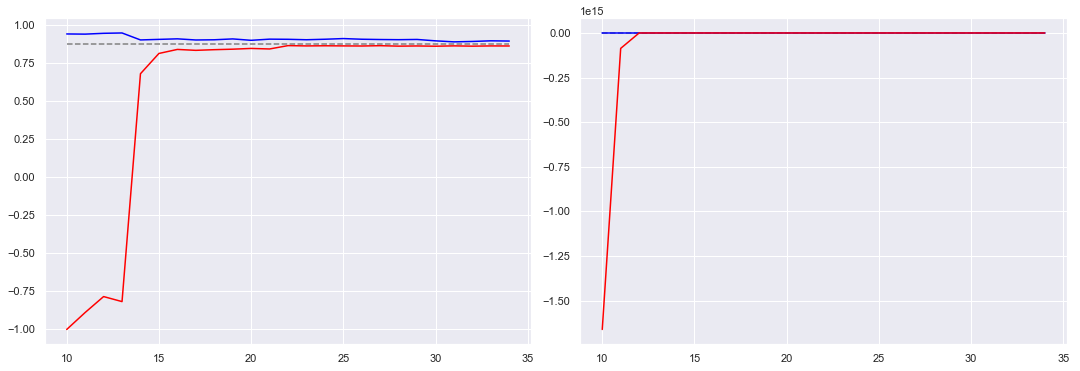

In [19]:
# Scikit-Learn学习曲线
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, 
                      figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# learning_curve()返回训练集大小，训练集得分，测试集得分
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y,
                                         cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), 
               color='blue', # 绿色
               label='training score') # 标签
    ax[i].plot(N, np.mean(val_lc, 1),
               color='red', # 红色
               label='validation score') # 标签
    # 画一条水平直线
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), # y轴位置
                 N[0], N[-1], # x轴起止点
                 color='gray', # 灰色
                 linestyle='dashed') # 点画线

# 网格搜索

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), # 模型
                    param_grid, # 验证参数
                    cv=7) # 7折交叉验证

In [21]:
grid.fit(X, y)

C:\Users\z\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
# 最优参数
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

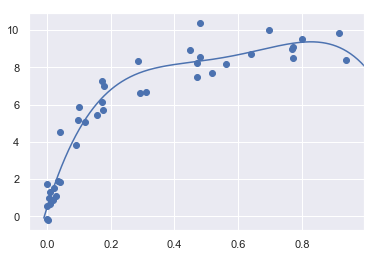

In [23]:
# 使用最优参数的模型来训练数据
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)